In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fftn, ifftn
%matplotlib inline

68.38566829297136

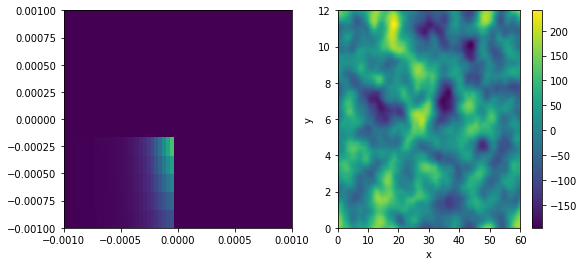

In [2]:

# topography
h0 = 110 # rms height
k0 = 2.2e-4 # roll-off wavenumber
l0 = 1e-3 # roll-off wavenumber
nu = 0.9 # high wavenumber power law

N = 1e-3 # stratification

nx = 2000;
ny = 400;
nz = 350;

dx = 30;
dy = 30;
dz = 10;

Lx = dx*nx
Ly = dy*ny

k_ = np.fft.fftfreq(nx//2+1,d=dx)
l_ = np.fft.fftfreq(ny//2+1,d=dy)
k,l = np.meshgrid(k_,l_)

# anisotropic topographic spectrum (following Polzin)
H = (4*np.pi*nu*h0**2)/(l0*k0*((k/k0)**2 + (l/l0)**2 + 1.0)**(nu+1))
H /= (nx//2+1)*(ny//2+1)

H = H*np.exp(1j*np.random.random((ny//2+1,nx//2+1))*2*np.pi)
#H[ny//2+1:,:]=0
#H[:,nx//2+1:]=0

h = np.fft.ifft2(H,(ny//2+1,nx//2+1))
x_ = np.linspace(0,nx*dx,nx//2+1)
y_ = np.linspace(0,ny*dy,ny//2+1)
x,y = np.meshgrid(x_,y_)

fig = plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.pcolor(k,l,np.abs(H),linewidth=0,cmap=plt.get_cmap("viridis"))
plt.xlim([-1.e-3,1.e-3])
plt.ylim([-1.e-3,1.e-3])

plt.subplot(1,2,2)
plt.pcolor(x/1000.,y/1000.,h.real,linewidth=0,cmap=plt.get_cmap("viridis"))
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

np.mean(h.real**2)**0.5

In [ ]:
# Reverse vertical axis so first index is at the surface and transpose axes
U = U[::-1,:,:]
V = V[::-1,:,:]
T = T[::-1,:,:]
C = C[::-1,:,:]

# Reverse vertical axis
R = R[::-1,:]
dz = dz[::-1,:1,:1]

# save input data as binary files
newFile = open("U.init", "wb")
newFile.write(bytes(U.astype('>f8')))
newFile = open("T.init", "wb")
newFile.write(bytes(T.astype('>f8')))
newFile.close()

newFile = open("ptracer_init.bin", "wb")
newFile.write(bytes(C.astype('>f8')))
newFile.close()

newFile = open("topog.init", "wb")
newFile.write(bytes(Hbot[0,:].astype('>f8')))
newFile.close()

newFile = open("delZ.init", "wb")
newFile.write(bytes(dz[:,0].astype('>f8')))
newFile.close()

# save restoring as a ascii / text file
np.savetxt('R.init',R)